In [1]:
#hide
! [ -e /content ] && pip install -Uqq fastbook
import fastbook
fastbook.setup_book()

     |████████████████████████████████| 719 kB 14.4 MB/s 
     |████████████████████████████████| 362 kB 79.9 MB/s 
     |████████████████████████████████| 1.2 MB 60.1 MB/s 
     |████████████████████████████████| 4.4 MB 54.3 MB/s 
     |████████████████████████████████| 140 kB 71.5 MB/s 
     |████████████████████████████████| 1.1 MB 49.5 MB/s 
     |████████████████████████████████| 101 kB 15.2 MB/s 
     |████████████████████████████████| 212 kB 74.0 MB/s 
     |████████████████████████████████| 596 kB 70.4 MB/s 
     |████████████████████████████████| 127 kB 79.0 MB/s 
     |████████████████████████████████| 144 kB 80.2 MB/s 
     |████████████████████████████████| 94 kB 4.4 MB/s 
     |████████████████████████████████| 271 kB 83.5 MB/s 
     |████████████████████████████████| 6.6 MB 63.6 MB/s 
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
datascience 0.1

In [2]:
#hide
from fastai.vision.all import *
from fastbook import *

matplotlib.rc('image', cmap='Greys')

In [3]:
path = untar_data(URLs.MNIST_SAMPLE)

In [4]:
path.ls()

(#3) [Path('/root/.fastai/data/mnist_sample/labels.csv'),Path('/root/.fastai/data/mnist_sample/valid'),Path('/root/.fastai/data/mnist_sample/train')]

In [5]:
(path/'train').ls()

(#2) [Path('/root/.fastai/data/mnist_sample/train/3'),Path('/root/.fastai/data/mnist_sample/train/7')]

In [6]:
(path/'train/3').ls()

(#6131) [Path('/root/.fastai/data/mnist_sample/train/3/16492.png'),Path('/root/.fastai/data/mnist_sample/train/3/21170.png'),Path('/root/.fastai/data/mnist_sample/train/3/14200.png'),Path('/root/.fastai/data/mnist_sample/train/3/16556.png'),Path('/root/.fastai/data/mnist_sample/train/3/51871.png'),Path('/root/.fastai/data/mnist_sample/train/3/45336.png'),Path('/root/.fastai/data/mnist_sample/train/3/34710.png'),Path('/root/.fastai/data/mnist_sample/train/3/12307.png'),Path('/root/.fastai/data/mnist_sample/train/3/1651.png'),Path('/root/.fastai/data/mnist_sample/train/3/21156.png')...]

In [7]:
im3_path = (path/'train/3').ls()[1]

In [8]:
im3 = Image.open(im3_path)
im3

In [9]:
threes = (path/'train/3').ls().sorted()
sevens = (path/'train/7').ls().sorted()
len(threes),len(sevens)

(6131, 6265)

In [10]:
threes_tensor = [tensor(Image.open(o)) for o in threes]
sevens_tensor = [tensor(Image.open(o)) for o in sevens]
len(threes_tensor), len(sevens_tensor)

(6131, 6265)

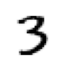

In [11]:
show_image(threes_tensor[1])

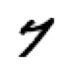

In [12]:
show_image(sevens_tensor[1])

In [13]:
stacked_threes = torch.stack(threes_tensor).float()/255
stacked_sevens = torch.stack(sevens_tensor).float()/255
stacked_threes.shape, stacked_sevens.shape

(torch.Size([6131, 28, 28]), torch.Size([6265, 28, 28]))

In [14]:
ideal_3 = stacked_threes.float().mean(0)/255
ideal_7 = stacked_sevens.float().mean(0)/255
ideal_3.shape, ideal_7.shape

(torch.Size([28, 28]), torch.Size([28, 28]))

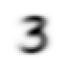

In [15]:
show_image(ideal_3)

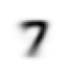

In [16]:
show_image(ideal_7)

In [17]:
a_3 = stacked_threes[1]

In [18]:
a_7 = stacked_sevens[1]

In [19]:
def mnsit_dist(a,b):
  return (a-b).abs().mean((-1,-2))

In [20]:
mnsit_dist(a_3, ideal_3)

tensor(0.1422)

In [21]:
mnsit_dist(a_7,ideal_3)

tensor(0.1572)

In [22]:
mnsit_dist(stacked_threes, ideal_3)

tensor([0.1426, 0.1422, 0.1432,  ..., 0.1604, 0.1133, 0.1405])

In [23]:
def is_3(a): return mnsit_dist(a,ideal_3)<mnsit_dist(a, ideal_7)

In [24]:
is_3(threes_tensor[1])

tensor(True)

In [25]:
valid_3_tns = [tensor(Image.open(o)) for o in (path/'valid/3').ls()]
valid_7_tns = [tensor(Image.open(o)) for o in (path/'valid/7').ls()]

valid_3_stacked = torch.stack(valid_3_tns).float()/255
valid_7_stacked  = torch.stack(valid_7_tns).float()/255

In [26]:
accuracy_3 = is_3(valid_3_stacked).float().mean()
accuracy_3

tensor(0.9436)

In [27]:
accuracy_7 = 1 - (is_3(valid_7_stacked).float().mean())
accuracy_7


tensor(0.9815)